# Hard spheres : Berlemont Kevin

We want to sample $n$ clothes-pins from the distribution :
$$ \pi(x_1,...,x_n) = \frac{1}{Z_n} \Pi_{ij} \theta(\vert x_i - x_j \vert - 2 \sigma)$$

First of all we will consider a direct sampling strategy, and plot the histogram of the resulting configurations.

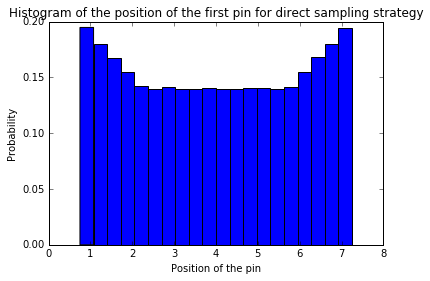

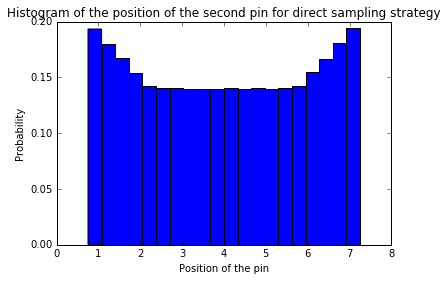

In [1]:
import random,pylab
%matplotlib inline

#Parameters
N = 2
L = 8.0
sigma = 0.75
n_configs = 1000000
#---------------------------

x1 = [] 
x2 = []
for config in range(n_configs):
    x = []
    while len(x) < N:
        x.append(random.uniform(sigma, L - sigma))
        for k in range(len(x) - 1):
            if abs(x[-1] - x[k]) < 2.0 * sigma:
                x = []
                break
    x1.append(x[0])
    x2.append(x[1])

#-----------------------------------------------------
#Graphical
pylab.figure(1)
pylab.hist(x1, bins=20, normed=True)
pylab.title('Histogram of the position of the first pin for direct sampling strategy')
pylab.xlabel('Position of the pin')
pylab.ylabel('Probability')

pylab.figure(2)
pylab.hist(x2, bins=20, normed=True)
pylab.title('Histogram of the position of the second pin for direct sampling strategy')
pylab.xlabel('Position of the pin')
pylab.ylabel('Probability')


pylab.show()

As we can observe the two distributions are the same. This seems to be a good point because the two pins are the same so the distribution of positions should be identical by symmetry of the problem.

Moreover we can note that at the center of the washing line we have a flat distribution, but at the boundaries we are more likely to find a pin. In order to try to understand this phaenomem we will compute an analytic form for the probability $P(x)$. (generalized for $n$ pins in order to anticipate the question 6)

Let's first place a pin at position $x$, and then $k$ other pins to its left, and $N-k-1$ to its right. The probability of this arrangement is $P_k(x)$ and the sum over all configurations gives $P(k)$. Using a combinatorial factor, we obtain ($Z_{N,L}$ partition sum):
$$
P(x) = \sum_{k=0}^{N-1} \underbrace{\frac{1}{Z_{N,L}}\binom{N-1}{k} Z_{k,x-\sigma} Z_{N-1-k,L-x-\sigma}}_{P(k)}
$$

By symmetry of the problem for any permutation  of the pins we have, if $L > 2 N \sigma$ :
$$ Z_{N,L} = (L - 2 N \sigma)^N $$
Thus, close to the boundary, only the $k=0$ contributes (we can't insert an other pins to it's left) !
$$ P(x \simeq \sigma) = P_0(x) = \frac{Z_{N-1,L-x-\sigma}}{Z_{N,L}} \simeq \frac{1}{L - 2N\sigma}[1 - \frac{N-1}{L - 2N \sigma} (x - \sigma)]$$

As we can see with this formula, at the boundary (left one) the probability is larger than the average $1/L$ and decreases with increasing $x$ because the remaining space to put other particles in diminishes.

Thus, we have explain the peak at the boundary by looking at the probability distribution close to the boundary. Moreover, we can compute numerically the probability distribution and fit out histogram with it.

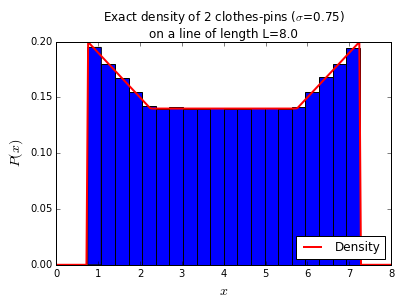

In [2]:
# Compute the distriubtion
def binomialCoeff(n, k): # coeff binomial, direct computing
    result = 1
    for i in range(1, k+1):
        result = result * (n-i+1) / i
    return result

def Z(N, L, sigma): # partition sum
    freespace = L - 2.0 * N * sigma
    if freespace > 0.0:
        result = freespace ** N
    else:
        result = 0.0
    return result

def P(x, N, L, sigma): #proba distribution with the formula befoore
    total = 0.
    for k in range(0, N):
        Z1 = Z(k, x - sigma, sigma)
        Z2 = Z(N - k - 1, L - x - sigma, sigma)
        total += binomialCoeff( N - 1, k) * Z1 * Z2
    Ztotal = Z(N, L, sigma)
    return total / Ztotal
#---------------------------------
#Parameters
N = 2
L = 8.0
sigma = 0.75

# Graphical fit
#---------------------------
xprob = pylab.linspace(0.0, L, 201)
yprob = [P(x, N, L, sigma) for x in xprob]

pylab.plot(xprob, yprob, 'red', linewidth=2.0,label='Density')
pylab.legend(loc=4)
pylab.hist(x1, bins=20, normed=True)
pylab.xlabel('$x$', fontsize=14)
pylab.ylabel('$P(x)$', fontsize=14)
pylab.title('Exact density of %i clothes-pins ($\sigma$=%s)\non a line of length L=%s' % (N, sigma, L))
pylab.show()


As we could predict, our formula fits perfectly hte histogram and valid the explanation of the peak of probability at the boundaries.

### Wrong sampling :

Now we will consider the wrong sampling. We sample first $x_1$, then $x_2$ and if $x_2$ has an overlap we try again to sample $x_2$ while keeping $x_1$. The point is to observe the difference with the first approach.

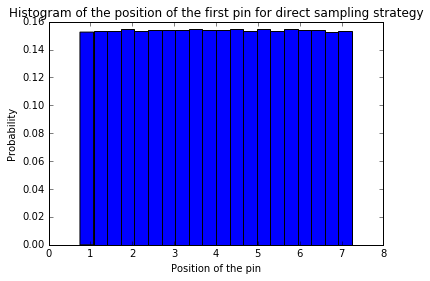

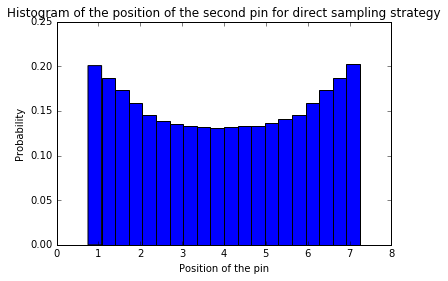

In [3]:
#Parameters
N = 2
L = 8.0
sigma = 0.75
n_configs = 1000000
x1 = []
x2 = []

#--------------------------------------
#Sampling 
for config in range(n_configs):
    x = []
    while len(x) < N:
        superposition = True
        while superposition == True :
            x.append(random.uniform(sigma, L - sigma))
            for k in range(len(x) - 1):
                if abs(x[-1] - x[k]) < 2.0 * sigma:
                    a=x.pop()
                    superposition == True
                    break 
                superposition = False
    x1.append(x[0])
    x2.append(x[1])
    
#---------------------------------------------------    
#Graphical
pylab.figure(1)
pylab.hist(x1, bins=20, normed=True)
pylab.title('Histogram of the position of the first pin for direct sampling strategy')
pylab.xlabel('Position of the pin')
pylab.ylabel('Probability')

pylab.figure(2)
pylab.hist(x2, bins=20, normed=True)
pylab.title('Histogram of the position of the second pin for direct sampling strategy')
pylab.xlabel('Position of the pin')
pylab.ylabel('Probability')


pylab.show()

If the probability distribution of the second pin is similar to the one of naive approach, and thus can be fit by the analytical formula. The one of the first pin is just an uniform distribution. The two distributions are not the same and the symmetry of the problem is broken. This algorithm is not working.

### Correct algorithm : N pins

We will now compute the correct algorithm for more than two pins and try to find some limits to this naivve algorithm.

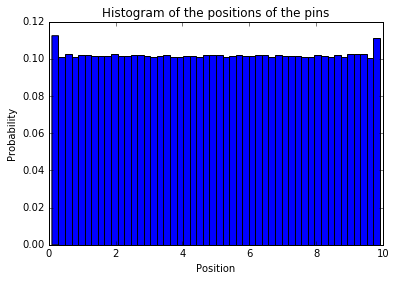

In [4]:
#Naive algo with generalization
def naive_algo(n_config,N,L,sigma):
    x_list=[]
    for config in range(n_configs):
        x = []
        while len(x) < N:
            x.append(random.uniform(sigma, L - sigma))
            for k in range(len(x) - 1):
                if abs(x[-1] - x[k]) < 2.0 * sigma:
                    x = []
                    break
        for x_pos in x :
            x_list.append(x_pos)
    return x_list
#------------------------------------------
#Parameters
N = 10
L = 10.0
sigma = 0.1
n_configs = 100000
#--------------------------------------------


x_list = naive_algo(n_configs,N,L,sigma)

#Graphical

pylab.figure(1)
pylab.hist(x_list, bins=50, normed=True)
pylab.title('Histogram of the positions of the pins')
pylab.xlabel('Position')
pylab.ylabel('Probability')
pylab.show()




For $N=10$ the histogram is kind of similar to the one for $N=2$ (peak at the boundaries) but the time used to compute this seems to be rapidly increasing. In order to study this we are now going to plot the probability of rejection of a sample with respect to $N$.

Because we have $Z_{N,L} = (L-2N\sigma)^N$, we can compute the acceptance rate :
$$ p_{accept} = \frac{(L-2N \sigma)^N}{(L-2 \sigma)^N}$$
if $L > 2 N \sigma$. In our cases we must have $N < 50$.

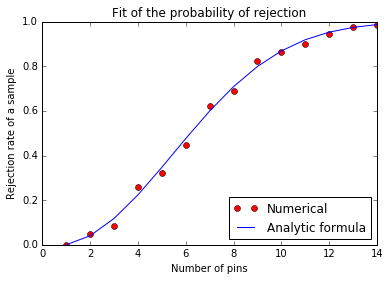

In [5]:
import numpy

# Rejection rate
def naive_algo_error(n_config,N,L,sigma):
    error=0
    
    for config in range(n_configs):
     
        x = []
        while len(x) < N:
            x.append(random.uniform(sigma, L - sigma))
            for k in range(len(x) - 1):
                if abs(x[-1] - x[k]) < 2.0 * sigma:
                    x = []
                    error +=1
                    break
        
    return error
    
#----------------------------------------------------    
# Parameters
N_list = numpy.arange(1,15,1)
L = 10.0
sigma = 0.1
n_configs = 100
error_list = []
proba_list = []
#-----------------------------------------------


for N in N_list:
    nbr_trial = naive_algo_error(n_configs,N,L,sigma)
    error_list.append(( nbr_trial)/float(n_configs+ nbr_trial))
    proba_list.append(1-(L - 2*N*sigma)**N/(L - 2*sigma)**N)
    

pylab.figure()
pylab.plot(N_list,error_list,'ro',label='Numerical')
pylab.plot(N_list,proba_list,label='Analytic formula')
pylab.legend(loc=4)
pylab.title('Fit of the probability of rejection')
pylab.xlabel('Number of pins')
pylab.ylabel('Rejection rate of a sample')

pylab.show()

As we can observe, the probability of rejection, or the number of trials before reaching a correct configuration, increases with $N$. Moreover it increases with the formula :
$$ \frac{(L-2N \sigma)^N}{(L-2 \sigma)^N}$$
For $N=15$ we have a probability of $\simeq 1.0$ and the time needed is close to infinite. With this algorithm we are not able to reach large number of pins.

### Clever procedure

Because of the huge limitation on the number of pins for the direct sampling we are looking for a better strategy.

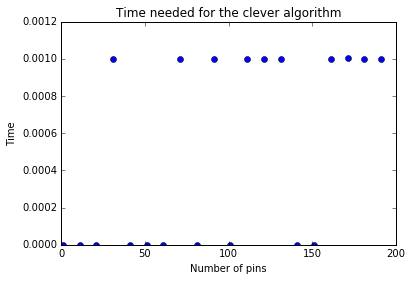

In [6]:
import time

# Clever algorithm
def clever_algo(n_config,N,L,sigma):
    x_list =[]
    for config in range(n_config):
        y = [random.uniform(0.0, L - 2 * N * sigma) for k in range(N)]
        y.sort()
        x=[y[i] + (2 * i + 1) * sigma for i in range(N)] # redimensionne la liste
        for pos in x :
            x_list.append(pos)
    
    return x_list
#------------------------------------------------
#Parameters
N_list = numpy.arange(1,200,10)
L = 20.0
sigma = 0.75
n_configs = 1
time_list = []
#---------------------------------------

for N in N_list:
    start = time.time()
    x_pos = clever_algo(n_configs,N,L,sigma)
    end = time.time()
    time_list.append(end - start)
  
# Graphical
pylab.figure()
pylab.plot(N_list,time_list,'ob')
pylab.title('Time needed for the clever algorithm')
pylab.xlabel('Number of pins')
pylab.ylabel('Time')

pylab.show()

As we can see, the time needed to compute the distribution is really small. We compute instantaneously configurations that would take infinite time with the naive approach.

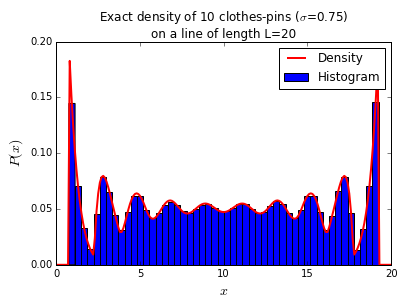

In [7]:
#Parameters
N=10
L=20
sigma = 0.75
n_configs = 100000
#-------------------------------
x_pos = clever_algo(n_configs,N,L,sigma)

#Grpahical

xprob = pylab.linspace(0.0, L, 201)
yprob = [P(x, N, L, sigma) for x in xprob]

pylab.plot(xprob, yprob, 'red', linewidth=2.0,label='Density')
pylab.hist(x_pos, bins=50, normed=True,label='Histogram')
pylab.legend()
pylab.xlabel('$x$', fontsize=14)
pylab.ylabel('$P(x)$', fontsize=14)
pylab.title('Exact density of %i clothes-pins ($\sigma$=%s)\non a line of length L=%s' % (N, sigma, L))
pylab.show()

In contrast to the results for $N=2$, the probability $P(x)$ of finding a pin at position $x$ depends strongly on position. We still have the peaks at the boundaries, that could be explain by the same arguments, and the very good fit by the analytical formula.
$$
P(x) = \sum_{k=0}^{N-1} \underbrace{\frac{1}{Z_{N,L}}\binom{N-1}{k} Z_{k,x-\sigma} Z_{N-1-k,L-x-\sigma}}_{P(k)}
$$

But the oscilaltions are quite surprising, and we can note a point where the probability of finding a pin falls almost to zero. This probability which falls, is explain by the fact that just after $\sigma$, because of the huge probability, the remaining space strongly diminishes, and thus the probability strongly decreases.
The oscillations can have an explanation too. In fact they seem to rises at constant interval. Indeed, all these peaks in $P(x)$ arise from the setting-in of sectors $k=1,2,...$,in the formula just above, every $2 \sigma$. We can note that the amplitude dies away rapidly, because we only have a small number of pins in regards to the length.

The following figure will just show the distance between the peaks in the density.

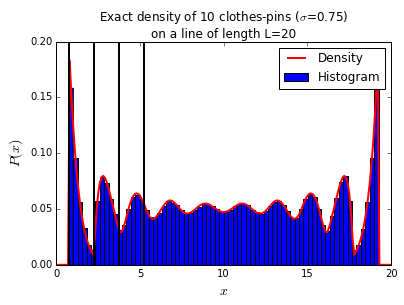

In [8]:
import matplotlib.pyplot as plt

xprob = pylab.linspace(0.0, L, 201)
yprob = [P(x, N, L, sigma) for x in xprob]

pylab.plot(xprob, yprob, 'red', linewidth=2.0,label='Density')
pylab.hist(x_pos, bins=70, normed=True,label='Histogram')
plt.axvline(sigma,color='k', linewidth=2.0)
plt.axvline(3*sigma,color='k', linewidth=2.0)
plt.axvline(5*sigma,color='k', linewidth=2.0)
plt.axvline(7*sigma,color='k', linewidth=2.0)

pylab.legend()
pylab.xlabel('$x$', fontsize=14)
pylab.ylabel('$P(x)$', fontsize=14)
pylab.title('Exact density of %i clothes-pins ($\sigma$=%s)\non a line of length L=%s' % (N, sigma, L))
pylab.show()

On this figure, the black lines are separated from each other by $2 \sigma$. For the first peaks, the separtion is from exactly $2 \sigma$, and increasing x, we find some variations in the distance.

## MCMC for hard sphere





We now consider a system of $n$ hard disks in two dimensions with periodic boundary conditions.

### Direct sampling

We implement directly the direct sampling strategy, and we want to see the limit in large densities, as in part 1.

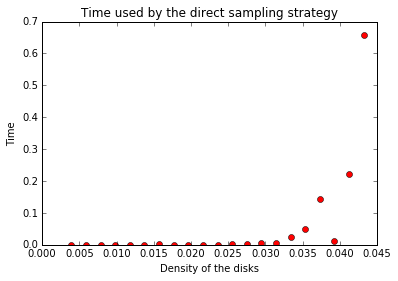

In [9]:
import random,math,time,pylab
#Direct sampling
def direct_disks_box(N, sigma):
    condition = False
    while condition == False:
        L = [(random.uniform(sigma, 4.0 - sigma), random.uniform(sigma, 4.0 - sigma))]
        for k in range(1, N):
            a = (random.uniform(sigma, 4.0 - sigma), random.uniform(sigma, 4.0 - sigma))
            min_dist = min(math.sqrt((a[0] - b[0]) ** 2 + (a[1] - b[1]) ** 2) for b in L) 
            if min_dist < 2.0 * sigma: 
                condition = False
                break
            else:
                L.append(a)
                condition = True
    return L
# ------------------------------------
#Parameters
N_list = numpy.arange(2,23,1)
sigma = 0.2
time_list=[]
densite_list = []

for N in N_list:
    start = time.time()
    position = direct_disks_box(N,sigma)
    end = time.time()
    time_list.append(end-start)
    densite_list.append(math.pi*N*((0.1)**2)/16)
#--------------------------------------------
#Graphical

pylab.figure()
pylab.plot(densite_list,time_list,'or')
pylab.title('Time used by the direct sampling strategy')
pylab.xlabel('Density of the disks')
pylab.ylabel('Time')

pylab.show()




As we can observe at $\rho = 0.4$ the time used to obtain a configuration strongly increases and we will not be ablte to manage density higher than this one. We need to look for other algorithm in order to be efficient. (Demo ??)

### MCMC for hard spheres

We will now consider MCMC on a periodic regular square lattive as initial condition. If we want to compute this periodicity we need to be careful in the way we are computing the distance between disks, and the grpahical functions.


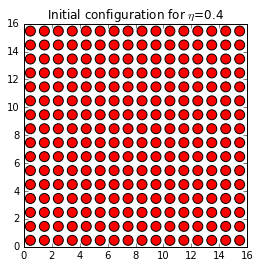

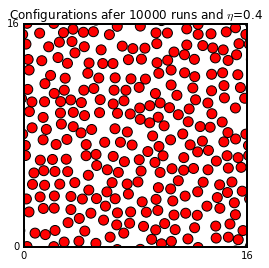

In [10]:
# Distance function
def distance(x,y,L): # on fait bien attention à ne prendre que la plus petite distance possible des2 possiiblités
    d_x = abs(x[0] - y[0]) % L # periodicity in L
    d_x = min(d_x, L - d_x) # can cross the obundary at the right or at the left
    d_y = abs(x[1] - y[1]) % L
    d_y = min(d_y, L - d_y)
    return  d_x ** 2 + d_y ** 2
#--------------------------------------------


# MCMC function
def MCMC(iteration,pos,sigma,delta,L):
    for iter in range(iteration):
        a = random.choice(pos)
        pos.remove(a)
        b = ((a[0] + random.uniform(-delta, delta)) % L, (a[1] + random.uniform(-delta,delta)) % L) # periodicity
        min_dist = min(distance(b,x,L) for x in pos)
        if  min_dist < 4.0 * sigma ** 2:
            pos.append(a)
        else:
            pos.append(b)
    return pos
#------------------------------------------

#Parameters
N=16; Ntot=N*N; eta=.4; # eta is density of disks
L=16.0
sigma=math.sqrt(L**2*eta/math.pi/(N**2))
delta = 0.3*sigma #stepsize
iteration = 10000

#Initialization
Dx=L/N
Dy=L/N
positions=[[(k1)*Dx+1.3*sigma,k2*Dy+1.3*sigma] for k1 in range(N) for k2 in range(N)] #square

#Graphical struff
pylab.axes()
for [x,y] in positions:
   cir=pylab.Circle((x,y), radius=sigma,  fc='r')
   pylab.gca().add_patch(cir)
pylab.axis('scaled')
pylab.title('Initial configuration for $\eta$=%s'%(eta))
pylab.show()
#-------------------------------------------------
# Plot the periodic boundaries
def periodicize(config,L):
    bounds = [-L, 0.0, L]
    return [(x + dx, y + dy) for (x,y) in config for dx in bounds for dy in bounds]

def view(pos,L, border_color = 'k'): # plot function : need to give a periodic one
    pylab.figure()
    pylab.axis([0, L, 0, L])
    [i.set_linewidth(2) for i in pylab.gca().spines.values()]
    [i.set_color(border_color) for i in pylab.gca().spines.values()]
    pylab.setp(pylab.gca(), xticks = [0, L], yticks = [0, L], aspect = 'equal')
    for (x, y) in pos:
        circle = pylab.Circle((x, y), radius = sigma, fc = 'r')
        pylab.gca().add_patch(circle)
    pylab.title('Configurations afer %i runs and $\eta$=%s'%(iteration,eta))
#--------------------------------------------------------------
        
positions=MCMC(iteration,positions,sigma,delta,L)        
view(periodicize(positions,L),L)

#### Determination $\delta$ :

As we have seen in Homework 2, the efficacity of MCMC method can be strongly improve with an appropriate choice of the stepsize $\delta$. Thus we will use the $1/2$ rule for several values of $\eta$, in order to optimize our algorithm. 

In [21]:
# Fucntion to compute the acceptance probability
def MCMC_delta(iteration,position,sigma,delta,L):
    acceptance = 0
    pos=position
    for iter in range(iteration):
        a = random.choice(pos)
        pos.remove(a)
        b = ((a[0] + random.uniform(-delta, delta)) % L, (a[1] + random.uniform(-delta,delta)) % L) # periodicity
        min_dist = min(distance(b,x,L) for x in pos)
        if  min_dist < 4.0 * sigma ** 2:
            pos.append(a)
        else:
            pos.append(b)
            acceptance +=1
    
    print (delta/sigma ,'                 ', acceptance/iteration)

    
#Parameters
eta_list=[0.3,0.5,0.72]
N=16; Ntot=N*N;
L=16.0   
iteration = 1000 
Dx=L/N
Dy=L/N
#-----------------------------------

for eta in eta_list :
    # Initialization
    sigma=math.sqrt(L**2*eta/math.pi/(N**2))
    positions_init=[[(k1)*Dx+1.3*sigma,k2*Dy+1.3*sigma] for k1 in range(N) for k2 in range(N)]
    print('\n')
    print('The density is %s'%(eta))
    print ('delta/sigma','       ', 'Probability of acceptance')
    for delta in [0.1*sigma,0.3*sigma,0.4*sigma,0.5*sigma,0.55*sigma,0.60*sigma,0.65*sigma,1.2*sigma]:
        MCMC_delta(iteration,positions_init,sigma,delta,L)
        
        
        




The density is 0.3
delta/sigma         Probability of acceptance
0.1                   1.0
0.3                   0.995
0.4                   0.934
0.5                   0.866
0.55                   0.815
0.6                   0.804
0.65                   0.773
1.2                   0.602


The density is 0.5
delta/sigma         Probability of acceptance
0.1                   1.0
0.3                   0.813
0.4                   0.614
0.5                   0.513
0.55                   0.492
0.6                   0.433
0.65                   0.431
1.2                   0.191


The density is 0.72
delta/sigma         Probability of acceptance
0.1                   0.549
0.3                   0.091
0.4                   0.061
0.5                   0.035
0.55                   0.02
0.6                   0.019
0.65                   0.018
1.2                   0.013


From now we will use the values of the stepsize verifying the $1/2$ rule for the corresponding $\eta$. We will now compute the MCMC method for several density.

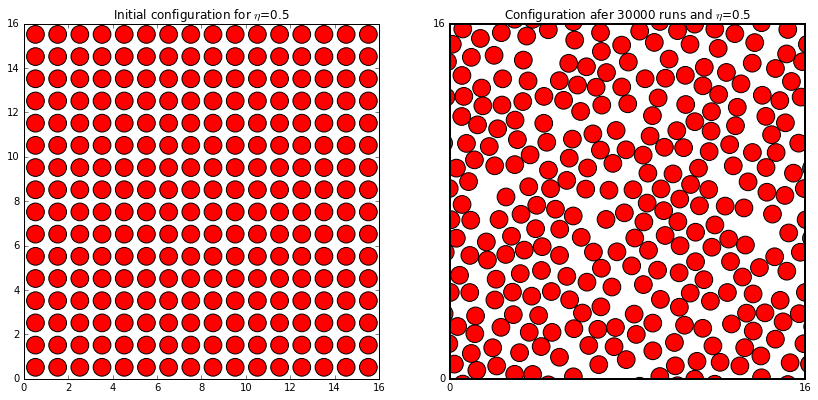

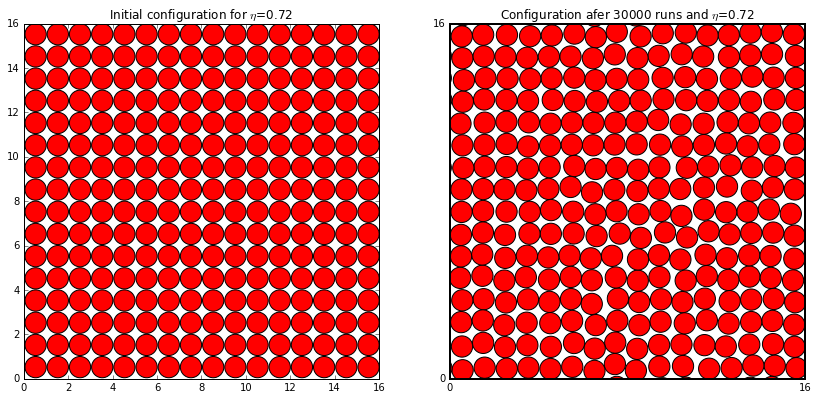

In [11]:
def view(pos,L, border_color = 'k'): # plot function : need to give a periodic one
    pylab.axis([0, L, 0, L])
    [i.set_linewidth(2) for i in pylab.gca().spines.values()]
    [i.set_color(border_color) for i in pylab.gca().spines.values()]
    pylab.setp(pylab.gca(), xticks = [0, L], yticks = [0, L], aspect = 'equal')
    for (x, y) in pos:
        circle = pylab.Circle((x, y), radius = sigma, fc = 'r')
        pylab.gca().add_patch(circle)
    pylab.title('Configuration afer %i runs and $\eta$=%s'%(iteration,eta))
#--------------------------------------------------------------

#Parameters eta=0.5
#------------------------------------
N=16; Ntot=N*N; eta=.5; 
L=16.0
sigma=math.sqrt(L**2*eta/math.pi/(N**2))
delta = 0.5*sigma # for eta = 0.5
iteration = 30000

#Initialization
Dx=L/N
Dy=L/N
positions_init=[[(k1)*Dx+1.3*sigma,k2*Dy+1.3*sigma] for k1 in range(N) for k2 in range(N)]

# ---------------------------------------------
plt.figure(figsize=(14,7))
ax1=plt.subplot(121)

for [x,y] in positions_init:
   cir=pylab.Circle((x,y), radius=sigma,  fc='r')
   pylab.gca().add_patch(cir)
ax1.axis('scaled')
pylab.title('Initial configuration for $\eta$=%s'%(eta))

#MCMC
plt.subplot(122)
positions=MCMC(iteration,positions_init,sigma,delta,L)        
view(periodicize(positions,L),L)
pylab.show()

#---------------------------------------
# Eta = 0.72
#-------------------------------------------
N=16; Ntot=N*N; eta=.72; 
L=16.0
sigma=math.sqrt(L**2*eta/math.pi/(N**2))
delta = 0.1*sigma # for eta = 0.72
iteration = 30000

#Initialization
Dx=L/N
Dy=L/N
positions_init=[[(k1)*Dx+1.1*sigma,k2*Dy+1.1*sigma] for k1 in range(N) for k2 in range(N)]

# ---------------------------------------------
plt.figure(figsize=(14,7))
ax1=plt.subplot(121)

for [x,y] in positions_init:
   cir=pylab.Circle((x,y), radius=sigma,  fc='r')
   pylab.gca().add_patch(cir)
ax1.axis('scaled')
ax1.set_ylim([0,L])
ax1.set_xlim([0,L])
pylab.title('Initial configuration for $\eta$=%s'%(eta))

#MCMC
plt.subplot(122)
positions=MCMC(iteration,positions_init,sigma,delta,L)        
view(periodicize(positions,L),L)
pylab.show()

As we can see we have two typical behavior with the several values of $\eta$. For moderate values of $\eta$ it seems that we have configurations that are liquid-like. It means that the spheres can move around, almost free. However for high $\eta$ the configuration seems to crystallize on a square lattice (the initial one). 

However the phase transition is not perfect, in the senze that it seems that he lattice at high $\eta$ is not totally regular and periodic. That's why we are going to study with more details, the local orientation of the disks in the lattice, for sevaral densities. This local orientation is defined by the order parameter :
$$ \psi_6 (k) = \frac{1}{\text{number of neighbors}} \sum_{neighbors} e^{6i \phi_{kj}}$$
with $\phi_{kj}$ the angle between the disks. Moreover, two disks are neighbors if the centers are less than $2.8 \sigma$ away from each other.

This leads to the following program :

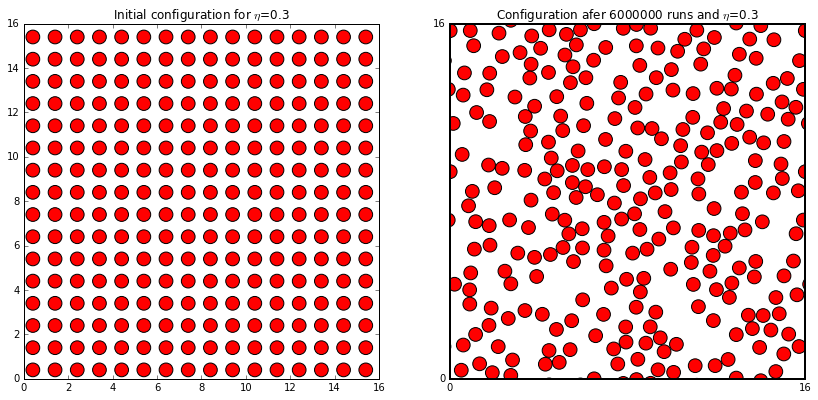

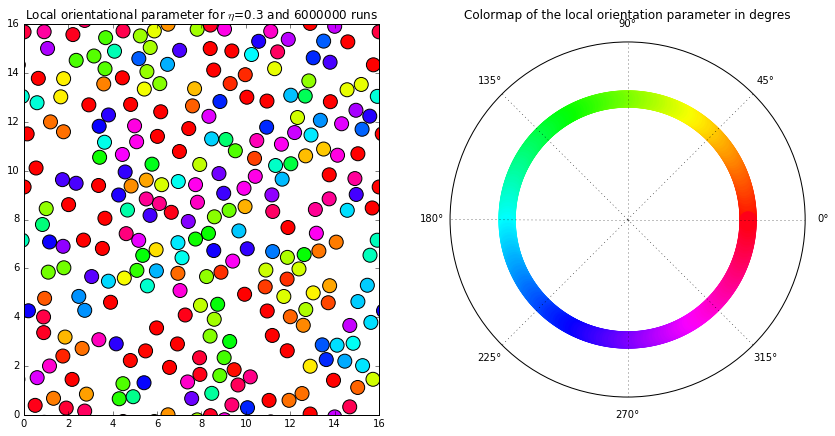



                                          New density                                       




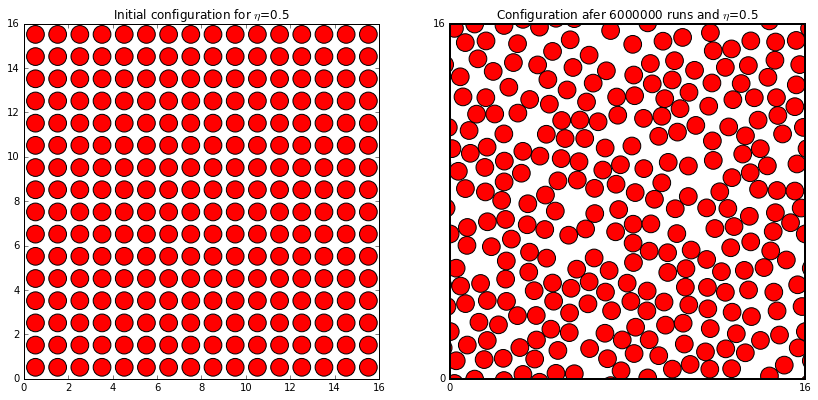

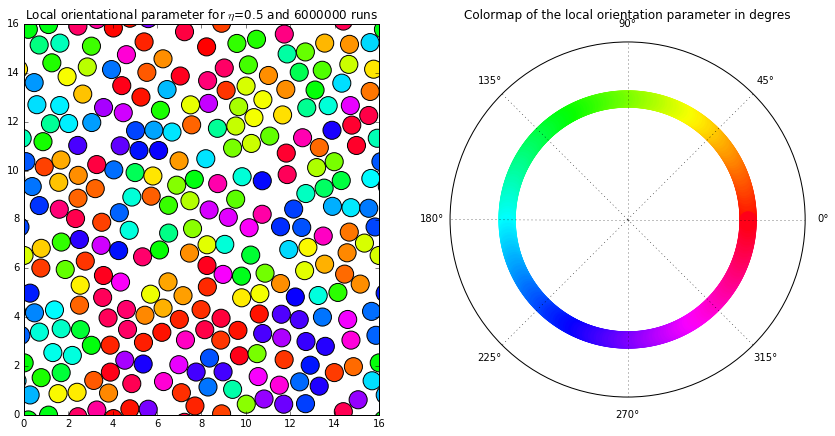



                                          New density                                       




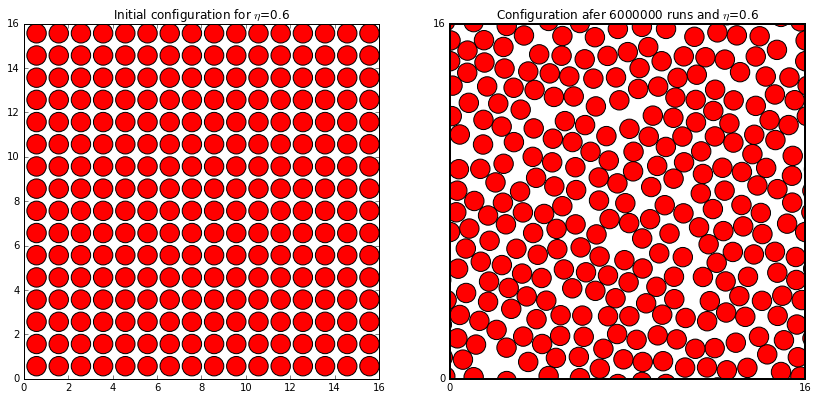

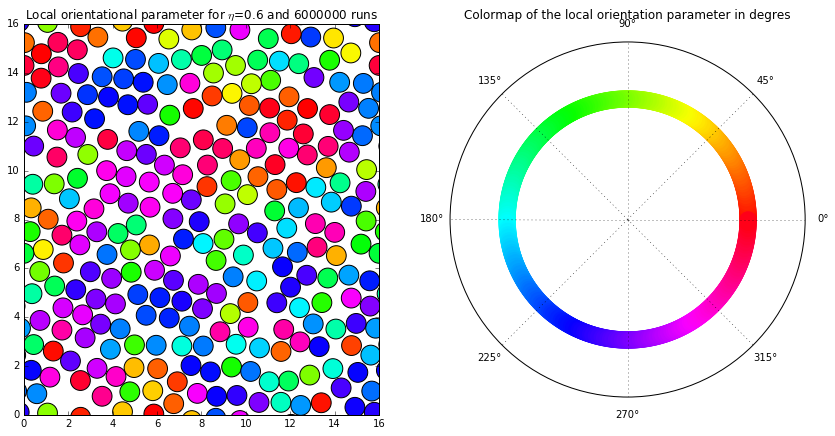



                                          New density                                       




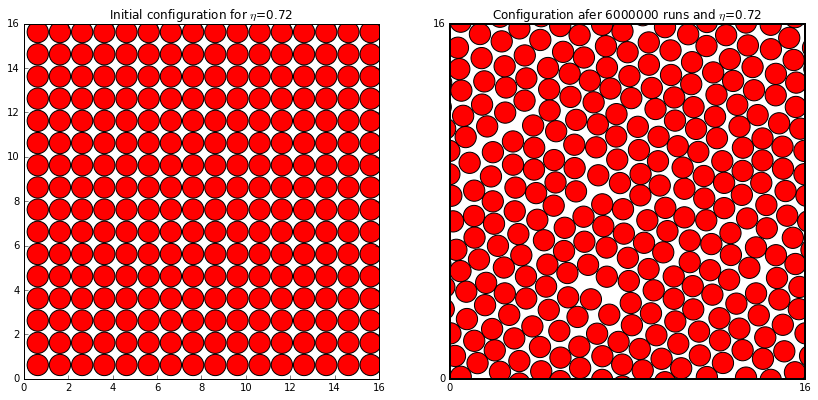

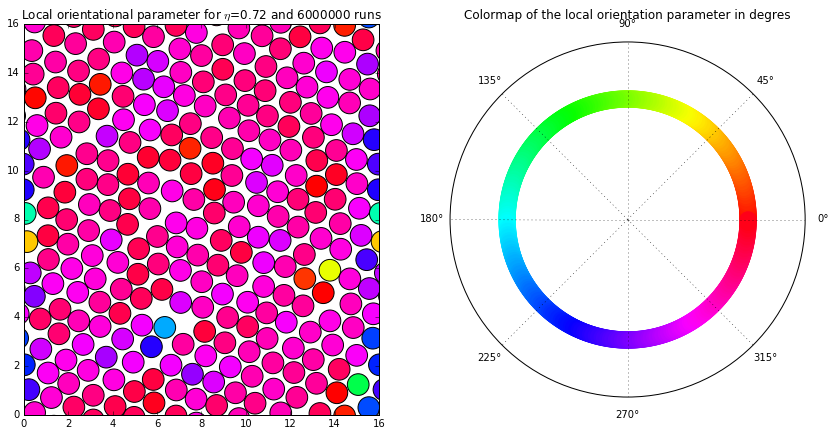

In [13]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from cmath import * # package for complex numbers

#local orientation function

def local_orient(positions):
    psi_tot = [] # order parameter for all disks
    for pos in positions :
        voisin = 0
        psi = 0
        for pos2 in positions :
            if pos2 != pos :
                if math.sqrt(distance(pos,pos2,L)) <= (2.8*sigma):
                    phi = numpy.arctan((pos2[0] - pos[0])/(pos2[1]-pos[1]))
                    z = complex(0,6*phi)
                    psi = psi + exp(z)
                    voisin +=1
        if voisin !=0: # if no neighbors
            psi = psi/voisin
        psi_tot.append(phase(psi)%(2*math.pi)) # order parameter in radian
    return psi_tot

#-----------------------------------------------------------------------
#----------------------------------------------------------------------
# eta = 0.3
#-----------------------------------------------------------------------
#-----------------------------------------------------------------------


N=16; Ntot=N*N; eta=.3; 
L=16.0
sigma=math.sqrt(L**2*eta/math.pi/(N**2))
delta = 1.2*sigma # for eta = 0.5
iteration = 6000000

#Initialization
Dx=L/N
Dy=L/N
positions_init=[[(k1)*Dx+1.3*sigma,k2*Dy+1.3*sigma] for k1 in range(N) for k2 in range(N)]

# ---------------------------------------------
#MCMC classic
plt.figure(figsize=(14,7))
ax1=plt.subplot(121)

for [x,y] in positions_init:
   cir=pylab.Circle((x,y), radius=sigma,  fc='r')
   pylab.gca().add_patch(cir)
ax1.axis('scaled')
pylab.title('Initial configuration for $\eta$=%s'%(eta))

#MCMC
plt.subplot(122)
positions=MCMC(iteration,positions_init,sigma,delta,L)        
view(periodicize(positions,L),L)
pylab.show()
#-----------------------------------------------------------------------
# local order parameter
x=[]
y=[]
for pos in positions :
    x.append(pos[0])
    y.append(pos[1])

colormap = plt.get_cmap('hsv')

plt.figure(figsize=(14,7))
ax1=plt.subplot(121)
ax1.scatter(x, y, c=(local_orient(positions)), s=470*(math.sqrt(L**2*0.72/math.pi/(N**2))/sigma)**(-2),cmap=colormap)
ax1.scatter(x+L*numpy.ones(len(x)), y, c=(local_orient(positions)), s=470*(math.sqrt(L**2*0.72/math.pi/(N**2))/sigma)**(-2),cmap=colormap)
ax1.scatter(x-L*numpy.ones(len(x)), y, c=(local_orient(positions)), s=470*(math.sqrt(L**2*0.72/math.pi/(N**2))/sigma)**(-2),cmap=colormap)
ax1.scatter(x+L*numpy.ones(len(x)), y+L*numpy.ones(len(x)), c=(local_orient(positions)), s=470*(math.sqrt(L**2*0.72/math.pi/(N**2))/sigma)**(-2),cmap=colormap)
ax1.scatter(x-L*numpy.ones(len(x)), y+L*numpy.ones(len(x)), c=(local_orient(positions)), s=470*(math.sqrt(L**2*0.72/math.pi/(N**2))/sigma)**(-2),cmap=colormap)
ax1.scatter(x-L*numpy.ones(len(x)), y-L*numpy.ones(len(x)), c=(local_orient(positions)), s=470*(math.sqrt(L**2*0.72/math.pi/(N**2))/sigma)**(-2),cmap=colormap)
ax1.scatter(x+L*numpy.ones(len(x)), y-L*numpy.ones(len(x)), c=(local_orient(positions)), s=470*(math.sqrt(L**2*0.72/math.pi/(N**2))/sigma)**(-2),cmap=colormap)
ax1.scatter(x, y+L*numpy.ones(len(x)), c=(local_orient(positions)), s=470*(math.sqrt(L**2*0.72/math.pi/(N**2))/sigma)**(-2),cmap=colormap)
ax1.scatter(x, y-L*numpy.ones(len(x)), c=(local_orient(positions)), s=470*(math.sqrt(L**2*0.72/math.pi/(N**2))/sigma)**(-2),cmap=colormap)
pylab.title('Local orientational parameter for $\eta$=%s and %i runs' %(eta,iteration))
ax1.axis([0,16,0,16])

ax2=plt.subplot(122,polar='True')
xval = np.arange(0, 2*pi, 0.01)
yval = np.ones_like(xval)
norm = mpl.colors.Normalize(0.0, 2*np.pi)
ax2.scatter(xval, yval, c=xval, s=300, cmap=colormap, norm=norm, linewidths=0)
ax2.set_yticks([])
pylab.title('Colormap of the local orientation parameter in degres')

plt.show()
print('\n')
print('                                          New density                                       ')
print('\n')

#-----------------------------------------------------------------------
#----------------------------------------------------------------------
# eta = 0.5
#-----------------------------------------------------------------------
#-----------------------------------------------------------------------


N=16; Ntot=N*N; eta=.5; 
L=16.0
sigma=math.sqrt(L**2*eta/math.pi/(N**2))
delta = 0.5*sigma # for eta = 0.5

#Initialization
Dx=L/N
Dy=L/N
positions_init=[[(k1)*Dx+1.3*sigma,k2*Dy+1.3*sigma] for k1 in range(N) for k2 in range(N)]

# ---------------------------------------------
#MCMC classic
plt.figure(figsize=(14,7))
ax1=plt.subplot(121)

for [x,y] in positions_init:
   cir=pylab.Circle((x,y), radius=sigma,  fc='r')
   pylab.gca().add_patch(cir)
ax1.axis('scaled')
pylab.title('Initial configuration for $\eta$=%s'%(eta))

#MCMC
plt.subplot(122)
positions=MCMC(iteration,positions_init,sigma,delta,L)        
view(periodicize(positions,L),L)
pylab.show()
#-----------------------------------------------------------------------
# local order parameter
x=[]
y=[]
for pos in positions :
    x.append(pos[0])
    y.append(pos[1])

colormap = plt.get_cmap('hsv')

plt.figure(figsize=(14,7))
ax1=plt.subplot(121)
ax1.scatter(x, y, c=(local_orient(positions)), s=470*(math.sqrt(L**2*0.72/math.pi/(N**2))/sigma)**(-2),cmap=colormap)
ax1.scatter(x+L*numpy.ones(len(x)), y, c=(local_orient(positions)), s=470*(math.sqrt(L**2*0.72/math.pi/(N**2))/sigma)**(-2),cmap=colormap)
ax1.scatter(x-L*numpy.ones(len(x)), y, c=(local_orient(positions)), s=470*(math.sqrt(L**2*0.72/math.pi/(N**2))/sigma)**(-2),cmap=colormap)
ax1.scatter(x+L*numpy.ones(len(x)), y+L*numpy.ones(len(x)), c=(local_orient(positions)), s=470*(math.sqrt(L**2*0.72/math.pi/(N**2))/sigma)**(-2),cmap=colormap)
ax1.scatter(x-L*numpy.ones(len(x)), y+L*numpy.ones(len(x)), c=(local_orient(positions)), s=470*(math.sqrt(L**2*0.72/math.pi/(N**2))/sigma)**(-2),cmap=colormap)
ax1.scatter(x-L*numpy.ones(len(x)), y-L*numpy.ones(len(x)), c=(local_orient(positions)), s=470*(math.sqrt(L**2*0.72/math.pi/(N**2))/sigma)**(-2),cmap=colormap)
ax1.scatter(x+L*numpy.ones(len(x)), y-L*numpy.ones(len(x)), c=(local_orient(positions)), s=470*(math.sqrt(L**2*0.72/math.pi/(N**2))/sigma)**(-2),cmap=colormap)
ax1.scatter(x, y+L*numpy.ones(len(x)), c=(local_orient(positions)), s=470*(math.sqrt(L**2*0.72/math.pi/(N**2))/sigma)**(-2),cmap=colormap)
ax1.scatter(x, y-L*numpy.ones(len(x)), c=(local_orient(positions)), s=470*(math.sqrt(L**2*0.72/math.pi/(N**2))/sigma)**(-2),cmap=colormap)
pylab.title('Local orientational parameter for $\eta$=%s and %i runs' %(eta,iteration))
ax1.axis([0,16,0,16])

ax2=plt.subplot(122,polar='True')
xval = np.arange(0, 2*pi, 0.01)
yval = np.ones_like(xval)
norm = mpl.colors.Normalize(0.0, 2*np.pi)
ax2.scatter(xval, yval, c=xval, s=300, cmap=colormap, norm=norm, linewidths=0)
ax2.set_yticks([])
pylab.title('Colormap of the local orientation parameter in degres')

plt.show()
print('\n')
print('                                          New density                                       ')
print('\n')



#-----------------------------------------------------------------------
#----------------------------------------------------------------------
# eta = 0.3
#-----------------------------------------------------------------------
#-----------------------------------------------------------------------


N=16; Ntot=N*N; eta=.6; 
L=16.0
sigma=math.sqrt(L**2*eta/math.pi/(N**2))
delta = 0.3*sigma # for eta = 0.6

#Initialization
Dx=L/N
Dy=L/N
positions_init=[[(k1)*Dx+1.3*sigma,k2*Dy+1.3*sigma] for k1 in range(N) for k2 in range(N)]

# ---------------------------------------------
#MCMC classic
plt.figure(figsize=(14,7))
ax1=plt.subplot(121)

for [x,y] in positions_init:
   cir=pylab.Circle((x,y), radius=sigma,  fc='r')
   pylab.gca().add_patch(cir)
ax1.axis('scaled')
ax1.axis([0,16,0,16])
pylab.title('Initial configuration for $\eta$=%s'%(eta))

#MCMC
plt.subplot(122)
positions=MCMC(iteration,positions_init,sigma,delta,L)        
view(periodicize(positions,L),L)
pylab.show()
#-----------------------------------------------------------------------
# local order parameter
x=[]
y=[]
for pos in positions :
    x.append(pos[0])
    y.append(pos[1])

colormap = plt.get_cmap('hsv')

plt.figure(figsize=(14,7))
ax1=plt.subplot(121)
ax1.scatter(x, y, c=(local_orient(positions)), s=470*(math.sqrt(L**2*0.72/math.pi/(N**2))/sigma)**(-2),cmap=colormap)
ax1.scatter(x+L*numpy.ones(len(x)), y, c=(local_orient(positions)), s=470*(math.sqrt(L**2*0.72/math.pi/(N**2))/sigma)**(-2),cmap=colormap)
ax1.scatter(x-L*numpy.ones(len(x)), y, c=(local_orient(positions)), s=470*(math.sqrt(L**2*0.72/math.pi/(N**2))/sigma)**(-2),cmap=colormap)
ax1.scatter(x+L*numpy.ones(len(x)), y+L*numpy.ones(len(x)), c=(local_orient(positions)), s=470*(math.sqrt(L**2*0.72/math.pi/(N**2))/sigma)**(-2),cmap=colormap)
ax1.scatter(x-L*numpy.ones(len(x)), y+L*numpy.ones(len(x)), c=(local_orient(positions)), s=470*(math.sqrt(L**2*0.72/math.pi/(N**2))/sigma)**(-2),cmap=colormap)
ax1.scatter(x-L*numpy.ones(len(x)), y-L*numpy.ones(len(x)), c=(local_orient(positions)), s=470*(math.sqrt(L**2*0.72/math.pi/(N**2))/sigma)**(-2),cmap=colormap)
ax1.scatter(x+L*numpy.ones(len(x)), y-L*numpy.ones(len(x)), c=(local_orient(positions)), s=470*(math.sqrt(L**2*0.72/math.pi/(N**2))/sigma)**(-2),cmap=colormap)
ax1.scatter(x, y+L*numpy.ones(len(x)), c=(local_orient(positions)), s=470*(math.sqrt(L**2*0.72/math.pi/(N**2))/sigma)**(-2),cmap=colormap)
ax1.scatter(x, y-L*numpy.ones(len(x)), c=(local_orient(positions)), s=470*(math.sqrt(L**2*0.72/math.pi/(N**2))/sigma)**(-2),cmap=colormap)
pylab.title('Local orientational parameter for $\eta$=%s and %i runs' %(eta,iteration))
ax1.axis([0,16,0,16])

ax2=plt.subplot(122,polar='True')
xval = np.arange(0, 2*pi, 0.01)
yval = np.ones_like(xval)
norm = mpl.colors.Normalize(0.0, 2*np.pi)
ax2.scatter(xval, yval, c=xval, s=300, cmap=colormap, norm=norm, linewidths=0)
ax2.set_yticks([])
pylab.title('Colormap of the local orientation parameter in degres')

plt.show()
print('\n')
print('                                          New density                                       ')
print('\n')

#-----------------------------------------------------------------------
#----------------------------------------------------------------------
# eta = 0.3
#-----------------------------------------------------------------------
#-----------------------------------------------------------------------


N=16; Ntot=N*N; eta=.72; 
L=16.0
sigma=math.sqrt(L**2*eta/math.pi/(N**2))
delta = 0.1*sigma # for eta = 0.5

#Initialization
Dx=L/N
Dy=L/N
positions_init=[[(k1)*Dx+1.3*sigma,k2*Dy+1.3*sigma] for k1 in range(N) for k2 in range(N)]

# ---------------------------------------------
#MCMC classic
plt.figure(figsize=(14,7))
ax1=plt.subplot(121)

for [x,y] in positions_init:
   cir=pylab.Circle((x,y), radius=sigma,  fc='r')
   pylab.gca().add_patch(cir)
ax1.axis('scaled')
ax1.axis([0,16,0,16])
pylab.title('Initial configuration for $\eta$=%s'%(eta))

#MCMC
plt.subplot(122)
positions=MCMC(iteration,positions_init,sigma,delta,L)        
view(periodicize(positions,L),L)
pylab.show()
#-----------------------------------------------------------------------
# local order parameter
x=[]
y=[]
for pos in positions :
    x.append(pos[0])
    y.append(pos[1])

colormap = plt.get_cmap('hsv')

plt.figure(figsize=(14,7))
ax1=plt.subplot(121)
ax1.scatter(x, y, c=(local_orient(positions)), s=470*(math.sqrt(L**2*0.72/math.pi/(N**2))/sigma)**(-2),cmap=colormap)
ax1.scatter(x+L*numpy.ones(len(x)), y, c=(local_orient(positions)), s=470*(math.sqrt(L**2*0.72/math.pi/(N**2))/sigma)**(-2),cmap=colormap)
ax1.scatter(x-L*numpy.ones(len(x)), y, c=(local_orient(positions)), s=470*(math.sqrt(L**2*0.72/math.pi/(N**2))/sigma)**(-2),cmap=colormap)
ax1.scatter(x+L*numpy.ones(len(x)), y+L*numpy.ones(len(x)), c=(local_orient(positions)), s=470*(math.sqrt(L**2*0.72/math.pi/(N**2))/sigma)**(-2),cmap=colormap)
ax1.scatter(x-L*numpy.ones(len(x)), y+L*numpy.ones(len(x)), c=(local_orient(positions)), s=470*(math.sqrt(L**2*0.72/math.pi/(N**2))/sigma)**(-2),cmap=colormap)
ax1.scatter(x-L*numpy.ones(len(x)), y-L*numpy.ones(len(x)), c=(local_orient(positions)), s=470*(math.sqrt(L**2*0.72/math.pi/(N**2))/sigma)**(-2),cmap=colormap)
ax1.scatter(x+L*numpy.ones(len(x)), y-L*numpy.ones(len(x)), c=(local_orient(positions)), s=470*(math.sqrt(L**2*0.72/math.pi/(N**2))/sigma)**(-2),cmap=colormap)
ax1.scatter(x, y+L*numpy.ones(len(x)), c=(local_orient(positions)), s=470*(math.sqrt(L**2*0.72/math.pi/(N**2))/sigma)**(-2),cmap=colormap)
ax1.scatter(x, y-L*numpy.ones(len(x)), c=(local_orient(positions)), s=470*(math.sqrt(L**2*0.72/math.pi/(N**2))/sigma)**(-2),cmap=colormap)
pylab.title('Local orientational parameter for $\eta$=%s and %i runs' %(eta,iteration))
ax1.axis([0,16,0,16])

ax2=plt.subplot(122,polar='True')
xval = np.arange(0, 2*pi, 0.01)
yval = np.ones_like(xval)
norm = mpl.colors.Normalize(0.0, 2*np.pi)
ax2.scatter(xval, yval, c=xval, s=300, cmap=colormap, norm=norm, linewidths=0)
ax2.set_yticks([])
pylab.title('Colormap of the local orientation parameter in degres')

plt.show()


If we run a long enough MCMC a several densities we can note that the local orientational parameter for "liquid-like" configurations doesn't seem to have an order. However for $\eta=0.72$ we clearly see a long-range order for the order parameter appear even if you are not totally at equilibirum. 

This seems to indicate that a kind of phase-transition occurs at this density, a phase transition of the local orientational order parameter, more than the configuration itself. To study with more details we should run the simulations with a larger lattice and for a longer time if we want to reach equilibrium.